In [6]:
import SimpleITK as sitk

def read_mhd_and_raw(file_path):

    itk_image = sitk.ReadImage(file_path)

    np_image = sitk.GetArrayFromImage(itk_image)
    return np_image


In [7]:
import numpy as np

def save_npz(np_image, output_file):
    np.savez_compressed(output_file, image=np_image)


In [8]:

np_image = read_mhd_and_raw("replace/with/your/file/path")
save_npz(np_image, "replace/with/your/output/path.npz")


In [9]:
def display_npz_properties(file_path):
    with np.load(file_path) as data:
        for key in data:
            array = data[key]
            print(f"Key: {key}")
            print(f"Shape: {array.shape}")
            print(f"Data type: {array.dtype}")
            print(f"Dimensions: {array.ndim}")
            print("------")

display_npz_properties("output.npz")


Key: image
Shape: (240, 240)
Data type: int16
Dimensions: 2
------


In [12]:

display_npz_properties("/scratch/kyu2eg/project_TransUNet/data/Synapse/train_npz/case0005_slice001.npz")


Key: image
Shape: (512, 512)
Data type: float32
Dimensions: 2
------
Key: label
Shape: (512, 512)
Data type: float32
Dimensions: 2
------


In [42]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_npz(file_path):
    data = np.load(file_path)

    image = data['image']
    label = data['label']

    if label.max() > 1 or label.min() < 0:
        print(1)
        label_cmap = 'viridis'
    else:
        print(2)
        label_cmap = 'tab20'

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(label, cmap=label_cmap)
    ax[1].set_title('Segmentation Label')
    ax[1].axis('off')
    plt.show()

In [64]:
import SimpleITK as sitk
import numpy as np
import os
from tqdm import tqdm

def read_mhd_and_raw(file_path, data_type):
    itk_image = sitk.ReadImage(file_path)
    np_image = sitk.GetArrayFromImage(itk_image)
    return np_image.astype(data_type)

def process_files(mri_folder, seg_folder, output_folder):
    k=0
    for i in tqdm(range(32088, 35200), desc="Processing files", unit="file"):#replace with your range
        mri_file = f"mri_{i}.mhd"
        seg_file = f"seg_{i}.mhd"

        mri_path = os.path.join(mri_folder, mri_file)
        seg_path = os.path.join(seg_folder, seg_file)

        if os.path.exists(mri_path) and os.path.exists(seg_path):
            mri_image = read_mhd_and_raw(mri_path, np.float32)
            seg_image = read_mhd_and_raw(seg_path, np.float32)

            npz_path = os.path.join(output_folder, f"combined_{i}.npz")
            np.savez_compressed(npz_path, image=mri_image, label=seg_image)
            k+=1
    print(k)

In [59]:
process_files("/scratch/kyu2eg/Segmentation_data/Training/Brains", "/scratch/kyu2eg/Segmentation_data/Training/Labels", "/scratch/kyu2eg/project_TransUNet/data/Synapse/train_custom")

1


In [65]:
process_files("/scratch/kyu2eg/Segmentation_data/Testing/Brains/", "/scratch/kyu2eg/Segmentation_data/Testing/Labels", "/scratch/kyu2eg/project_TransUNet/data/Synapse/test_ours")

Processing files: 100%|██████████| 3112/3112 [00:11<00:00, 261.75file/s]

380


In [41]:
display_npz_properties("/scratch/kyu2eg/project_TransUNet/data/Synapse/test_1/combined_0.npz")
display_npz_properties("/scratch/kyu2eg/project_TransUNet/data/Synapse/test_1/combined_1.npz")

Key: image
Shape: (240, 240)
Data type: float32
Dimensions: 2
------
Key: label
Shape: (240, 240)
Data type: float32
Dimensions: 2
------
Key: image
Shape: (240, 240)
Data type: float32
Dimensions: 2
------
Key: label
Shape: (240, 240)
Data type: float32
Dimensions: 2
------


1


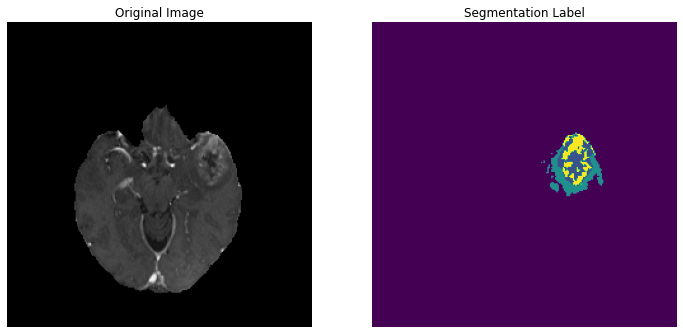

1


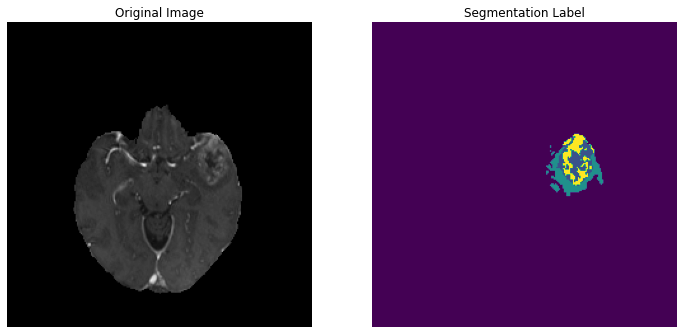

In [44]:
visualize_npz("/scratch/kyu2eg/project_TransUNet/data/Synapse/test_1/combined_0.npz")
visualize_npz("/scratch/kyu2eg/project_TransUNet/data/Synapse/test_1/combined_1.npz")

In [60]:
import h5py

def display_h5_properties(file_path):
    with h5py.File(file_path, 'r') as h5_file:
        for key in h5_file.keys():
            print(f"Key: {key}")
            print(f"Shape: {h5_file[key].shape}")
            print(f"Data type: {h5_file[key].dtype}")
            print(f"Dimensions: {h5_file[key].ndim}")
            print("------")


In [61]:
display_h5_properties('/scratch/kyu2eg/project_TransUNet/data/Synapse/test_vol_h5/case0001.npy.h5')

Key: image
Shape: (147, 512, 512)
Data type: float32
Dimensions: 3
------
Key: label
Shape: (147, 512, 512)
Data type: uint8
Dimensions: 3
------


In [66]:
display_npz_properties("/scratch/kyu2eg/project_TransUNet/data/Synapse/test_ours/combined_32088.npz")


Key: image
Shape: (240, 240)
Data type: float32
Dimensions: 2
------
Key: label
Shape: (240, 240)
Data type: float32
Dimensions: 2
------
